## Week 3 Capstone Work

For Week 3, include concepts such as linear regression with forward and backward selection, PCR, and PLSR. Complete your Jupyter Notebook homework by 11:59 pm ET on Sunday. 

In [1]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read in previous data
team = pd.read_csv('data/cleaned/teamstats_eng.csv', sep=',', header=0)
wr = pd.read_csv('data/cleaned/wr_eng.csv', sep=',', header=0)

In [26]:
team.columns, wr.columns

(Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
        'points_opp', 'points_diff', 'total_yards', 'plays_offense',
        'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
        'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
        'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
        'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
        'score_pct', 'turnover_pct', 'exp_pts_tot', 'injuries',
        'fumbles_lost_sq', 'penalties_sq', 'total_yards_sq'],
       dtype='object'),
 Index(['Length', 'Distance', 'DirChanges', 'Max_S', 'Max_A', 'Injury_Duration',
        'Temperature', 'Precipitation', 'FieldType_Natural',
        'PlayType_Extra Point', 'PlayType_Field Goal', 'PlayType_Kickoff',
        'PlayType_Kickoff Not Returned', 'PlayType_Kickoff Returned',
        'PlayType_Pass', 'PlayType_Punt', 'PlayType_Punt Not Returned',
        'PlayType_Punt Returned', 'PlayType_Rush', 'Le

In [27]:
# Team stats to predict inj
X_team = team.drop(columns=['year', 'team', 'wins', 'losses', 'injuries']).copy()
y_team = team['injuries'].copy()
scores_team = []

# Team stats to predict win_loss_perc
X_team2 = team.drop(columns=['year', 'team', 'wins', 'losses', 'win_loss_perc']).copy()
y_team2 = team['win_loss_perc'].copy()
scores_team2 = []

# wr play by play stats to predict injury duration
X_wr = wr.drop(columns=['Injury_Duration']).copy()
y_wr = wr['Injury_Duration'].copy()
scores_wr = []

### Feature Selection

##### Forward

In [28]:
team_fw_pipeline = Pipeline([('scaler', StandardScaler()),
    ('feature_selection', SequentialFeatureSelector(
        estimator = ElasticNet(alpha= 100, random_state= 42),
        direction = 'forward',
        cv = RepeatedKFold(n_splits= 5, n_repeats=2, random_state= 42),
        scoring = 'neg_mean_squared_error')),
    ('regressor', ElasticNet(alpha=100, random_state=42))
])

team_fw_params = {'feature_selection__n_features_to_select': [5, 10, 20]}

team_fw_gs = GridSearchCV(estimator=team_fw_pipeline, param_grid=team_fw_params, cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42), scoring='neg_mean_squared_error')

team_fw_gs.fit(X_team, y_team)

print("N Components:", team_fw_gs.best_params_)
print("RMSE:", np.sqrt(-team_fw_gs.best_score_))

N Components: {'feature_selection__n_features_to_select': 5}
RMSE: 18.81070290390732


In [29]:
team2_fw_pipeline = Pipeline([('scaler', StandardScaler()),
    ('feature_selection', SequentialFeatureSelector(
        estimator = ElasticNet(alpha= .25, random_state= 42),
        direction = 'forward',
        cv = RepeatedKFold(n_splits= 5, n_repeats=2, random_state= 42),
        scoring = 'neg_mean_squared_error')),
    ('regressor', ElasticNet(alpha=.25, random_state=42))
])

team2_fw_params = {'feature_selection__n_features_to_select': [5, 10, 20]}

team2_fw_gs = GridSearchCV(estimator=team2_fw_pipeline, param_grid=team2_fw_params, cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42), scoring='neg_mean_squared_error')

team2_fw_gs.fit(X_team2, y_team2)

print("N Components:", team2_fw_gs.best_params_)
print("RMSE:", np.sqrt(-team2_fw_gs.best_score_))

N Components: {'feature_selection__n_features_to_select': 5}
RMSE: 0.15378212941009037


In [30]:
wr_fw_pipeline = Pipeline([('scaler', StandardScaler()),
    ('feature_selection', SequentialFeatureSelector(
        estimator = Ridge(alpha=1.75, random_state= 42),
        direction = 'forward',
        cv = RepeatedKFold(n_splits= 5, n_repeats=2, random_state= 42),
        scoring = 'neg_mean_squared_error')),
    ('regressor', Ridge(alpha=1.75, random_state=42))
])

wr_fw_params = {'feature_selection__n_features_to_select': [5, 10, 20]}

wr_fw_gs = GridSearchCV(estimator=wr_fw_pipeline, param_grid=wr_fw_params, cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42), scoring='neg_mean_squared_error')

wr_fw_gs.fit(X_wr, y_wr)

print("N Components:", wr_fw_gs.best_params_)
print("RMSE:", np.sqrt(-wr_fw_gs.best_score_))

N Components: {'feature_selection__n_features_to_select': 20}
RMSE: 3.9351547801952895


##### Backward

In [31]:
team_bw_pipeline = Pipeline([('scaler', StandardScaler()),
    ('feature_selection', SequentialFeatureSelector(
        estimator = ElasticNet(alpha= 100, random_state= 42),
        direction = 'backward',
        cv = RepeatedKFold(n_splits= 5, n_repeats=2, random_state= 42),
        scoring = 'neg_mean_squared_error')),
    ('regressor', ElasticNet(alpha=100, random_state=42))
])

team_bw_params = {'feature_selection__n_features_to_select': [5, 10, 20]}

team_bw_gs = GridSearchCV(estimator=team_bw_pipeline, param_grid=team_bw_params, cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42), scoring='neg_mean_squared_error')

team_bw_gs.fit(X_team, y_team)

print("N Components:", team_bw_gs.best_params_)
print("RMSE:", np.sqrt(-team_bw_gs.best_score_))

N Components: {'feature_selection__n_features_to_select': 5}
RMSE: 18.81070290390732


In [32]:
team2_bw_pipeline = Pipeline([('scaler', StandardScaler()),
    ('feature_selection', SequentialFeatureSelector(
        estimator = ElasticNet(alpha= .25, random_state= 42),
        direction = 'backward',
        cv = RepeatedKFold(n_splits= 5, n_repeats=2, random_state= 42),
        scoring = 'neg_mean_squared_error')),
    ('regressor', ElasticNet(alpha=.25, random_state=42))
])

team2_bw_params = {'feature_selection__n_features_to_select': [5, 10, 20]}

team2_bw_gs = GridSearchCV(estimator=team2_bw_pipeline, param_grid=team2_bw_params, cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42), scoring='neg_mean_squared_error')

team2_bw_gs.fit(X_team2, y_team2)

print("N Components:", team2_bw_gs.best_params_)
print("RMSE:", np.sqrt(-team2_bw_gs.best_score_))

N Components: {'feature_selection__n_features_to_select': 5}
RMSE: 0.15378212941009037


In [33]:
wr_bw_pipeline = Pipeline([('scaler', StandardScaler()),
    ('feature_selection', SequentialFeatureSelector(
        estimator = Ridge(alpha=1.75, random_state= 42),
        direction = 'backward',
        cv = RepeatedKFold(n_splits= 5, n_repeats=2, random_state= 42),
        scoring = 'neg_mean_squared_error')),
    ('regressor', Ridge(alpha=1.75, random_state=42))
])

wr_bw_params = {'feature_selection__n_features_to_select': [5, 10, 20]}

wr_bw_gs = GridSearchCV(estimator=wr_bw_pipeline, param_grid=wr_bw_params, cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42), scoring='neg_mean_squared_error')

wr_bw_gs.fit(X_wr, y_wr)

print("N Components:", wr_bw_gs.best_params_)
print("RMSE:", np.sqrt(-wr_bw_gs.best_score_))

N Components: {'feature_selection__n_features_to_select': 20}
RMSE: 3.9375396187615954


### How many PC's are optimal?

In [34]:
scaler_team = StandardScaler()
scaler_team2 =StandardScaler()
scaler_wr = StandardScaler()

pca_team = PCA()
pca_team2 = PCA()
pca_wr = PCA()

X_team_scaled = scaler_team.fit_transform(X_team)
X_team2_scaled = scaler_team2.fit_transform(X_team2)
X_wr_scaled = scaler_wr.fit_transform(X_wr)

pca_team.fit(X_team_scaled)
pca_team2.fit(X_team2_scaled)
pca_wr.fit(X_wr_scaled)

print(f'Team Explained Variance Ratio: {pca_team.explained_variance_ratio_.tolist()}')
print(f'Team2 Explained Variance Ratio: {pca_team2.explained_variance_ratio_.tolist()}')
print(f'WR Explained Variance Ratio: {pca_wr.explained_variance_ratio_.tolist()}')

Team Explained Variance Ratio: [0.36692373102238957, 0.18748986250844918, 0.10632482680577737, 0.09301786015757994, 0.053647098039892836, 0.04950991411180332, 0.03587063926778397, 0.03081737797830134, 0.01583696099446989, 0.014848821304535922, 0.011761052736510326, 0.007259156569674366, 0.005455479318358938, 0.00455504155745537, 0.0038609624766756984, 0.0035716538973224465, 0.0032827164104746666, 0.0022481739318270678, 0.001053645416428887, 0.0009106332456731118, 0.00070168255104004, 0.00033735876108400154, 0.00025913331058640657, 0.00018015236487338053, 0.00016268445498962035, 8.022806284797486e-05, 3.3152743194350825e-05, 8.593231489217526e-18, 1.1237407130443997e-18, 0.0, 0.0]
Team2 Explained Variance Ratio: [0.35081865398098566, 0.18578313148323516, 0.10519634594004441, 0.09303433570807972, 0.05251807928550539, 0.04591078466965918, 0.034841597587899634, 0.03229012655368554, 0.02873687544536453, 0.015430016354896136, 0.014684096231322797, 0.011210294528514787, 0.007071450549309711, 

I am going to choose 2 for all three sets, since the variance drops to about 10% on the third for all three followed by a slower decline

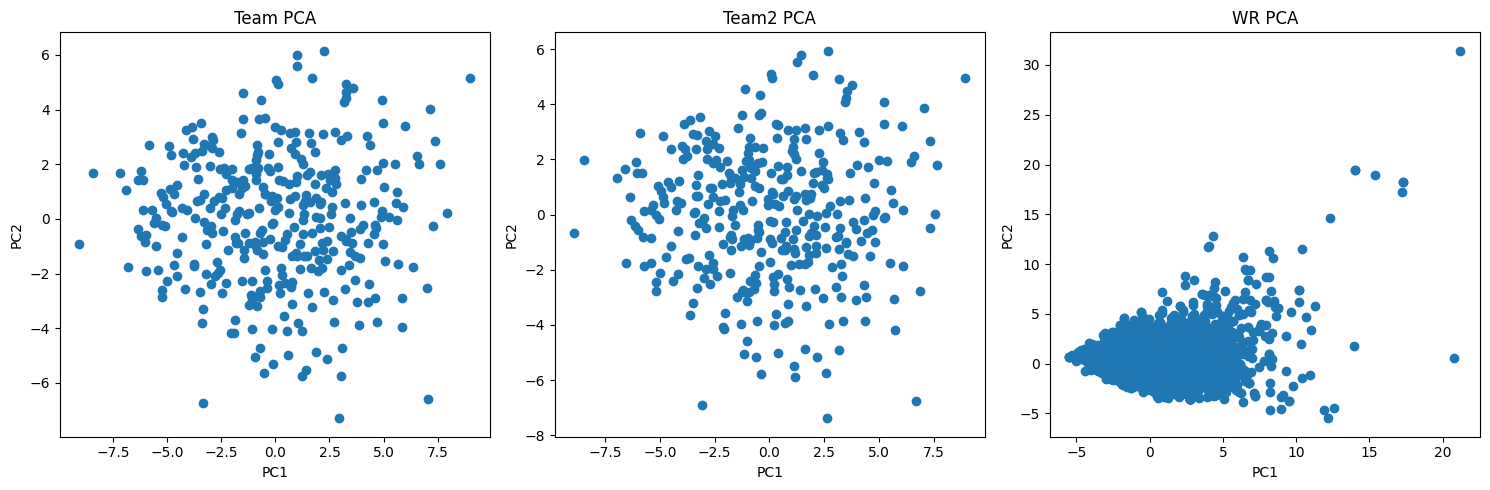

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

X_team_pca = pca_team.transform(X_team_scaled)
axes[0].scatter(X_team_pca[:, 0], X_team_pca[:, 1])
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Team PCA')

X_team2_pca = pca_team2.transform(X_team2_scaled)
axes[1].scatter(X_team2_pca[:, 0], X_team2_pca[:, 1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Team2 PCA')

X_wr_pca = pca_wr.transform(X_wr_scaled)
axes[2].scatter(X_wr_pca[:, 0], X_wr_pca[:, 1])
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].set_title('WR PCA')

plt.tight_layout()
plt.show()

This is not promising, there is no clear direction here... WR is a little better, but nonlinear.

### Perform PCR

In [36]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42, n_components=2)),
    ('regressor', LinearRegression())
])

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

PCR_scores = [np.sqrt(-cross_val_score(estimator=pipeline, X=X_team, y=y_team, scoring='neg_mean_squared_error', cv=rkf))/y_team.std(), 
              np.sqrt(-cross_val_score(estimator=pipeline, X=X_team2, y=y_team2, scoring='neg_mean_squared_error', cv=rkf))/y_team2.std(),
              np.sqrt(-cross_val_score(estimator=pipeline, X=X_wr, y=y_wr, scoring='neg_mean_squared_error', cv=rkf))/y_wr.std()]

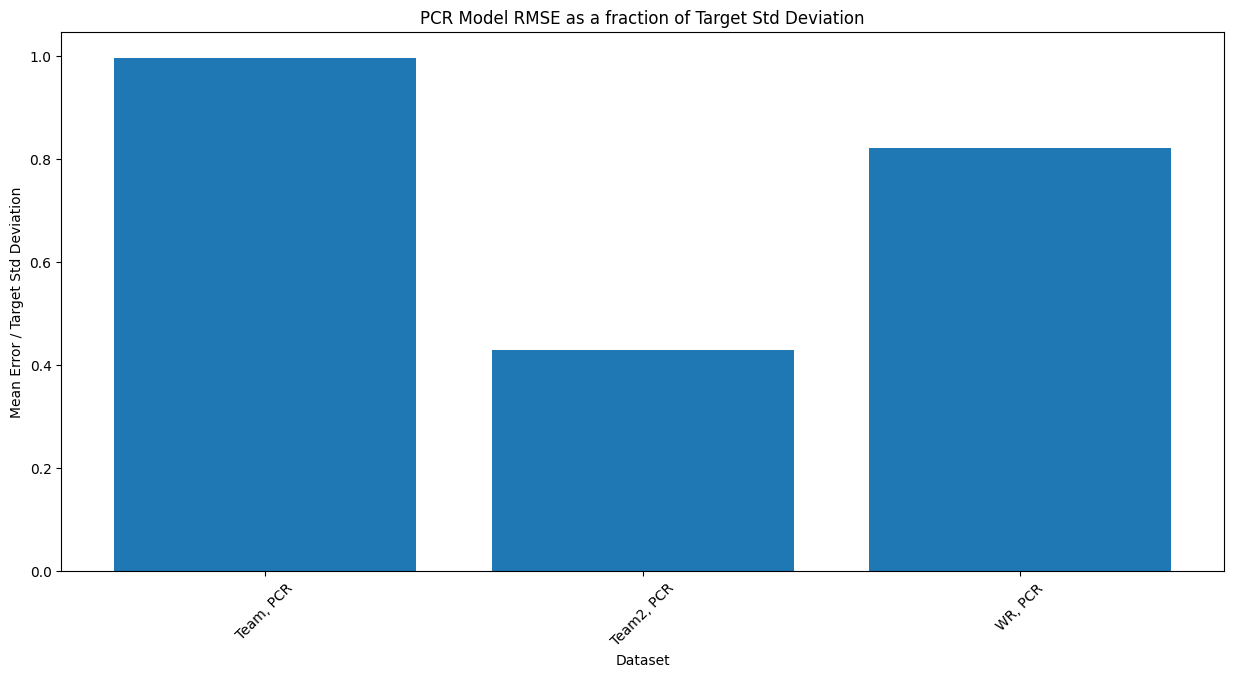

In [37]:
PCR_scores = [18.708476/y_team.std(), 0.081180/y_team2.std(), 3.934314/y_wr.std()]
PCR_labels = ['Team, PCR', 'Team2, PCR', 'WR, PCR']

plt.figure(figsize=(15, 7))
plt.bar(PCR_labels, PCR_scores)
plt.xticks(rotation=45)
plt.title('PCR Model RMSE as a fraction of Target Std Deviation')
plt.ylabel('Mean Error / Target Std Deviation')
plt.xlabel('Dataset')
plt.show()

This looks very similar to the optimized models from last week, maybe PCR using them is better?